<a href="https://colab.research.google.com/github/MatteusStranger/pac_man_intelligence/blob/master/Relatorio/Trabalho_1_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div align="center">
    <h1> <b>MO416 - Introdução à Inteligência Artificial  </h1>
    <h2> <b>Comparativo de Algoritmos de Busca na Solução do Desafio PacMan </h2>
</div>




<tr><td style="text-align:left">Matteus Vargas   </td>  <td>262885</td>  </tr>
<tr><td style="text-align:left">Christian Maekawa</td>  <td>231867</td>  </tr>
<tr><td style="text-align:left">Stéfani Fernandes</td>  <td>147939</td>  </tr>
<tr><td style="text-align:left">Maisa Silva      </td>  <td>181831</td>  </tr>
<tr><td style="text-align:left">Giovane de Morais</td>  <td>192683</td>  </tr>

## 1. Introdução

O presente relatório apresenta a descrição das estratégias adotadas para a resolução do Projeto 1 da disciplina Introdução à Inteligência Artificial, ministrada no primeiro semestre de 2020 pela professora Dra. Esther Luna Colombini.

No presente projeto, foram selecionados, e aplicados, métodos de busca de Inteligência Artificial (IA) ao jogo Pacman, um clássico dos arcades. Nesse jogo, pacman (também conhecido como "come-come") deve alcançar um objetivo final, marcado em uma determinada posição no mapa, comendo pílulas ao longo do caminho e evitar os "fantasmas" que ficam em movimento ao longo do mapa, que irão fazer de tudo para que o herói não tenha êxito.

Os métodos de busca selecionados visam demonstrar qual é o melhor caminho entre a origem (pacman) e o destino (objetivo), em função de regras estabelecidas para esta versão do jogo especificamente. 

Por fim, os algoritmos são comparados entre si levando em consideração um conjunto de parâmetros de testes para afirmar qual é o melhor para determinado cenário dentro do jogo.

As descrições supracitadas serão trabalhadas e apresentada em detalhes ao longo deste relatório que, por sua vez, está estruturado da seguinte forma:

1. Apresentação da modelagem do jogo: cenário, seus componentes e as regras do jogo
2. Descrição das partes mais importantes da implementação
3. Explicação dos métodos de busca e suas respectivas heurísticas, caso hajam
4. Testes e seus resultados: parâmetros de testes, cenários modelados e avaliação de cada algoritmo
5. Discussão e conclusões finais

## 2. Modelagem do problema

O foco principal deste problema é encontrar um caminho que leve o pacman até o objetivo, finalizando o jogo com vitória. O objetivo secundário é fazer com que o pacman prefira um caminho que haja mais pílulas a serem coletadas. Para que isso seja possível, o nosso herói é induzido a obedecer um conjunto de regras, representados graficamente por determinados caracteres:

* '#': representa uma parede. Obstáculo físico que impede a passagem do pacman.
* '&': fantasma. Por padrão, há três deles em posições aleatórias no mapa. Quando nosso herói os vê ele fica com medo e busca um caminho alternativo.
* ' ': espaço vazio. O nosso herói entende espaços vazios como sendo buracos, portanto devem ser evitados.

Além desses, há outros caracteres que serão melhor discutidos na análise do **mapa**.
Com essas regras supracitadas, o nosso herói inevitavelmente deve ir por caminhos que contenham pílulas. Tais regras foram inseridas diretamente nos algoritmos de busca, como será discutido à frente. Obviamente, o cenário todo é passado para o pacman que irá avaliá-lo e desenhar o caminho ideal, o qual é mostrado em tela como uma sequência de caracteres '+'. Algo que deve ser observado é que por conter regras limitantes no andar do pacman, haverão situações onde, possivelmente, **não haverá caminho algum**.

### 2.1. Mapa

O pacman é colocado em um mapa onde ele deve coletar pílulas e chegar ao objetivo final, respeitando as regras estabelecidas. 

O mapa se encontra em um arquivo chamado **maze.in**, o qual o pacman o lê para que o mesmo seja visualizado pelo nosso herói antes de serem aplicadas as buscas. A sua representação é:
<div align="center">
  <img src="https://raw.githubusercontent.com/MatteusStranger/pac_man_intelligence/master/Relatorio/ImagensIA/mapa.png">
</div>

O mapa é fechado por paredes, com dimensão de 28x28 caracteres '#'. Alguns caracteres já foram descritos os seus papeis, como as paredes, fantasmas e espaços vazios. Os demais, no entanto devem ser melhor detalhados:

* '@': pacman. Representação da origem.
* '$': objetivo. Representação do destinho.
* '.': pílulas.

Como mencionado, o mapa é lido de um arquivo à parte e passado ao pacman e, em seguida, repassado aos algoritmos de buscas. Esse é chamado de **mapa padrão**, contudo não é o único.

O mapa é o elemento mais importante deste projeto, já que é nele que iremos variar os cenários de busca. Para isso, há uma interação com o usuário, quando ele executa o arquivo **main.py** (*python main.py*) onde é solicitado que se escolha entre o **mapa padrão** ou **mapa aleatório**. O mapa aleatório toma como referência o mapa padrão, contudo os seus elementos internos ('#','@','$','.',' ') tem as suas posições alteradas, elevando a gama de cenários possíveis, desde os mais simples (pacman "nascer" ao lado o objetivo) até impossíveis (sem caminho algum, independente do algoritmo de busca). 

A vantagem de um gerador de mapas é que isso gera uma boa quantidade de **cenários alternativos**, sem a necessidade de alterações manuais. Abaixo, o trecho de código que representa a passagem do mapa para o pacman:

```python

def main():
    mapa = {}
    chars = ['c']
    inicio = None
    fim = None
    largura = 0
    altura = 0
    static_map = False

    opcoes = user.inicializa()

    if (opcoes == 1):
        static_map = True
    elif (opcoes == 2):
        static_map = False
    else:
        print('Opção inválida')

    if (opcoes in (1, 2)):
        if static_map:
            fp = open('./maze/maze.in', 'r') # leitura do mapa padrão
        else:
            fp = io.StringIO(map_template()) # mapa aleatório
        while len(chars) > 0: # entendimento dos elementos do mapa
            chars = [str(i) for i in fp.readline().strip()]
            largura = len(chars) if largura == 0 else largura
            for x in range(len(chars)):
                mapa[(x, altura)] = chars[x]
                if (chars[x] == '@'):
                    inicio = (x, altura)
                elif (chars[x] == '$'):
                    fim = (x, altura)
            if (len(chars) > 0):
                altura += 1

        fp.close()

        opcoes = user.algoritmo_options()

        path = ''
        # chamada dos procedimentos futuros
        if (opcoes == 1): 
            for i in range(5):
                executa(100, mapa, inicio, fim, largura, altura, i)
        elif (opcoes == 2):
            i = user.list_algoritmos()
            if (i in range(0, 5)):
                executa(100, mapa, inicio, fim, largura, altura, i)
            else:
                print('Opção inválida')
        else:
            print('Opção Inválida')
```

Como afirmado antes, o mapa aleatório utiliza como referencial o mapa padrão, mas alterando a ordem os elementos internos, variando a quantidade de cenários possíveis. No **main.py** ele é chamado por:

```python
fp = io.StringIO(map_template()) # mapa aleatório
```

O gerador se encontra em **randomfill/generate.py**, da seguinte forma:

```python
from randomfill.walls import Map 
import sys
import numpy as np
from tools.conversor import conversor

def generateDefaultRandomMap():
    maze = ""
    tileMap = Map(16,31,"""
    ||||||||||||||||
    |...............
    |...............
    |...............
    |...............
    |...............
    |...............
    |...............
    |...............
    |...............
    |...............
    |...............
    |.........||||||
    |.........||||||
    |.........||||||
    |.........||||||
    |.........||||||
    |...............
    |...............
    |...............
    |...............
    |...............
    |...............
    |...............
    |...............
    |...............
    |...............
    |...............
    |...............
    |...............
    ||||||||||||||||
    """)

    # generate map by adding walls until there's no more room
    while tileMap.add_wall_obstacle(extend=True):
        pass

    # reflect the first 14 columns to print the map
    for line in str(tileMap).splitlines():
        s = line[:14]
        maze += s+s[::-1] + '\n' 
    return maze

def available_path(maze):
    """Identify available path.
    Considering available path equal 1 this function returno all available path as list of tupla.
    Arguments:
        maze: numpy array[row][column]
    Returns:
        suffle_path(list): List of tuple with available position e.g [(0,1),(1,1)...]  
    """
    idx_goals = np.where(maze == 1)
    sff_idx = list()
    for i in range(len(idx_goals[0])):
        sff_idx.append((idx_goals[0][i],idx_goals[1][i]))
    np.random.shuffle(sff_idx)
    return sff_idx    

def add_hole(n_hole,maze,inplace=False):
    """Add hole in the map.
    This function will add hole in random location 
    Arguments:
        n_hole (int): number of hole
        maze (narray): narray: numpy array[row][column]
        inplace(bool): overwrite maze or make copy
    Returns:
        narray: numpy array[row][column]
    """
    if inplace:
        for position in available_path(maze)[:n_hole]:
            maze[position[0]][position[1]] = 3
        return maze
    else:
        maze_copy = maze.copy()
        for position in available_path(maze_copy)[:n_hole]:
            maze_copy[position[0]][position[1]] = 3
        return maze_copy

def add_block(n_block,maze,inplace=False):
    """Add block in the map.
    This function will add 4 as a block 
    Args:
        n_block (int): number of block
        maze (narray): narray: numpy array[row][column]
        inplace(bool): overwrite maze or make copy
    Returns:
        narray: numpy array[row][column]
    """
    if inplace:
        for position in available_path(maze)[:n_block]:
            maze[position[0]][position[1]] = 4
        return maze
    else:
        maze_copy = maze.copy()
        for position in available_path(maze_copy)[:n_block]:
            maze_copy[position[0]][position[1]] = 4
        return maze_copy
  
def map_template(row=31,column=28): # dimensões do mapa
  # Permutação de elementos, usando os procedimentos acima
    temp_map = generateDefaultRandomMap()
    np_map = conversor.conv_str2int(row,column,temp_map)
    add_hole(10,np_map,inplace=True)
    add_block(3,np_map,inplace=True)
    start_position = available_path(np_map)[:1][0]
    end_position = available_path(np_map)[:1][0]
    np_map[start_position[0]][start_position[1]] = 2
    np_map[end_position[0]][end_position[1]] = 5
    return conversor.conv_int2str(np_map)
```

Com o mapa elaborado, partiremos para a análise de atributos específicos do nosso herói.

### 2.2. Ações

As ações do pacman no jogo se resumem à sua movimentação, que são quatro no total: esquerda, direita, cima ou baixo. Entretanto, nem sempre todas elas estão disponíveis para nosso herói usar. Dependendo dos obstáculos, e a sua regra no momento, alguma ação será removida. Por exemplo, caso ele encontre um fantasma à sua direita, logo ele não poderá se encaminhar por ali, diminuindo o seu número de ações para três. Isso pode ser resumido na seguinte fórmula:

```python
numero_acoes_momento = total_de_acoes - quantidade_de_obstaculos_adjacentes
```
No código, a lista de ações não é explicitada, por isso a necessidade de explanar o que o herói está fazendo. No código, as ações do Pacman é representado por:
```python
for proximo in vizinhos: # listagem de vizinhos
            # Pega valor do mapa
            valor_mapa = mapa.get(proximo)
            # Verifique se é uma parede, fantasma ou obstáculo
            if ((valor_mapa == '#') or (valor_mapa == '&') or (valor_mapa == ' ')):
                continue
```

Dado a listagem de vizinhos, de acordo com a posição, ele chama as regras e decide por onde ele pode seguir, ou seja, qual ação a ser tomada naquele instante.
### 2.3. Nós (nodes)

O nó (representado pela classe **No**) é composto pela posição do pacman naquele instante, o seu pai (nó anterior de onde o pacman veio), distância do nó inicial, distância até a meta e o custo total. Especialmente a distância do nó até a meta é o campo mais importante no cálculo da heurística, como veremos mais à frente. A distância do nó inicial permite que se determine a profundidade, ou seja, até onde ele está indo para alcançar o objetivo, bem como reconstituir toda a trajetória.
O nó, somado com o conjunto de ações, permite expandir as próximas possibilidades de movimentação do pacman.

```python
# Implementação da classe nó
class No:
    def __init__(self, posicao: (), pai: ()):
        self.posicao = posicao
        self.pai = pai
        self.g = 0 # Distância para iniciar o nó
        self.h = 0 # Distância ao nó da meta
        self.f = 0 # Custo total
```

No código, temos sempre dois nós "iniciais": inicio e objetivo. A partir do primeiro, o Pacman quererá chegar no segundo:

```python
no_inicio = No.No(inicio, None)
no_objetivo = No.No(fim, None)

###################################

# Verifique se atingimos a meta, retorne o caminho
if no_atual == objetivo_no:
```
Do início até o objetivo, devemos expandir os nós durante esse percurso e usar seus atributos para tecer informações daquele momento e do trajeto como um todo.




## 3. Metodologia

A metodologia deste projeto se divide em duas partes bem-definidas: escolha, e implementação, dos métodos de busca, bem as duas heurísticas escolhidas (quando for necessário aplicá-las). Algo que precisa ficar bem claro é que as regras supracitadas indicam ao nosso herói que o caminho "válido" é aquele que contém pílulas, mas ainda assim a rota deve ser a mais "curta possível", ou seja, o **menor caminho** da origem ao destino. Diferentemente do game original, aqui maximizar a quantidade de pílulas não é o foco, mas a **menor rota gerada**.

Portanto, o que será avaliado (Seção testes e resultados) será o custo desse caminho, em função de duas métricas: nós expandidos e tempo de execução (biblioteca *Time* do Python, que mede o tempo de execução). Contudo, uma única execução em um único cenário não dá toda a dimensão de possibilidades, haja visto que há vários elementos em jogo e mais de um algoritmo a ser executado. Portanto, uma série de parametrizações e variações no cenário foram feitos para explorar ao máximo as possibilidades do jogo, seguindo o seguinte roteiro:

* Execução no mapa padrão, sem alterar nada;
* Executar em um mapa aleatório:
  * Comparar os resultados do mapa padrão;
  * Verificar a disposição dos elementos internos (distância entre origem e destino e posicionamento dos inimigos);
* No mapa padrão, e um aleatório, alterar a quantidade de fantasmas, da seguinte forma:
  * Quantidade de fantasmas: 3 (padrão), 10 e 15;
  * Os espaços vazios não serão alterados, porque já vem em alta quantidade (65). Por isso, o mapa aleatório será útil aqui;
* Para cada execução acima, será computado:
  * A quantidade de nós expandidos;
  * Tempo de execução;
  * Comparar a rota gerada e com a análise manual feita pela equipe, a fim de determinar se havia outra rota melhor, no que se denomina o "quão esperto" o algoritmo foi;
  * Especificamente sobre as heurísticas, confrontar uma contra a outra para determinar se houve superioridade de uma sobre a outra na execução.

A seguir, as implementações dos algoritmos de busca.


### 3.1. - Implementações

Foram implementados dois métodos de busca sem informação, dois métodos de pesquisa informada de heurísticas distintas e um método de busca local. Segue abaixo os algoritmos eleitos para a resolução da problemática "PacMan".

#### **Busca em Largura**

A busca em largura começa por um vértice, *s*. O algoritmo visita *s*, depois visita todos os vizinhos de s, depois todos os vizinhos dos vizinhos, e assim por diante.

O algoritmo numera os vértices, em sequência, na ordem em que eles são descobertos (ou seja, visitados pela primeira vez).  Para fazer isso, o algoritmo usa uma FIFO (First in First Out) de vértices. No início de cada iteração, a fila contém vértices que já foram numerados mas têm vizinhos ainda não numerados.

No quesito desempenho, $b$ é o número médio de sucessores e $d$ a profundidade mais rasa da solução.

**Medidas de desempenho:**

**Completo**: Sim, essa estratégia é classificada como completa, pois encontra a meta, se existir.

**Ótimo:** Sim, apenas se todos os caminhos tiverem o mesmo custo.

**Complexidade de tempo:** $ O (b ^ d) $

**Complexidade da memória:** $ O (b ^ d) $

Abaixo, fornecemos a implementação da busca em largura em Python:
```python
from tools import estrutura_dados as No


def breadth_first_search(mapa, inicio, fim):
    # Criar listas para nós abertos e nós fechados
    aberto = []
    fechado = []
    # Crie um nó representando o inicio e o objetivo
    inicio_node = No.No(inicio, None)
    objetivo = No.No(fim, None)
    # Adiciona nó inicial
    aberto.append(inicio_node)

    # Repetir até que a lista aberta esteja vazia
    while len(aberto) > 0:
        # Pegue o primeiro nó (FIFO)
        no_atual = aberto.pop(0)
        # Adicione o nó atual à lista fechada
        fechado.append(no_atual)
        # Verifique se atingimos a meta, retorne o caminho
        if no_atual == objetivo:
            caminho = []
            while no_atual != inicio_node:
                caminho.append(no_atual.posicao)
                no_atual = no_atual.pai
                # Retornar caminho invertido
            return caminho[::-1]
        # Pega a posição atual do nó
        (x, y) = no_atual.posicao
        # Pega os vizinhos
        vizinhos = [(x - 1, y), (x + 1, y), (x, y - 1), (x, y + 1)]

        # Loop nos vizinhos
        for proximo in vizinhos:
            # Pega valor do mapa
            valor = mapa.get(proximo)
            # Verifique se é uma parede, fantasma ou obstáculo
            if (valor == '#') or (valor == '&') or (valor == ' '):
                continue
            # Crie o nó vizinho
            vizinho = No.No(proximo, no_atual)
            # Checa se o vizinho está em fechado
            if (vizinho in fechado):
                continue
            # Adicione o nó se não estiver aberto
            if (vizinho not in aberto):
                aberto.append(vizinho)

    return None
```

#### **Busca em profundidade**

Essa estratégia tem a capacidade de pesquisar em uma estrutura de dados do tipo grafo. A distância de um nó ao nó inicial é usada para explorar os dados. A idéia principal é que ele explore um nó com uma distância maior, sem explorar qualquer outro nó da mesma distância, se possível. Uma estrutura de pilha é geralmente utilizada conforme a regra LIFO (*Last In First Out*).

**Medidas de desempenho:**

**Completo:** Não, pode criar um loop infinito se um ramo não tiver fim.

**Otimizado:** Não, não há garantia de que encontrará a melhor solução, mesmo que todos os caminhos tenham o mesmo custo.

**Complexidade de tempo:** $ O (b ^ d) $

**Complexidade da memória:** $ O (bd) $

Abaixo, fornecemos a implementação em Python:

```python
from tools import estrutura_dados as No


def depth_first_search(mapa, inicio, fim):
    # Criar listas para nós abertos e nós fechados
    aberto = []
    fechado = []

    # Crie um nó representando o inicio e o objetivo
    no_inicio = No.No(inicio, None)
    no_objetivo = No.No(fim, None)
    # Adiciona nó inicial
    aberto.append(no_inicio)

    # Repetir até que a lista aberta esteja vazia
    while len(aberto) > 0:
        # Obtenha o último nó (LIFO)
        no_atual = aberto.pop(-1)
        # Adicione o nó atual à lista fechada
        fechado.append(no_atual)
        # Verifique se atingimos a meta, retorne o caminho
        if no_atual == no_objetivo:
            path = []
            while no_atual != no_inicio:
                path.append(no_atual.posicao)
                no_atual = no_atual.pai
                # Retornar caminho invertido
            return path[::-1]

        # Pega a posição atual do nó
        (x, y) = no_atual.posicao
        # Pega os vizinhos
        vizinhos = [(x - 1, y), (x + 1, y), (x, y - 1), (x, y + 1)]
        # Loop nos vizinhos
        for proximo in vizinhos:
            # Pega valor do mapa
            valor_mapa = mapa.get(proximo)
            # Verifique se é uma parede, fantasma ou obstáculo
            if ((valor_mapa == '#') or (valor_mapa == '&') or (valor_mapa == ' ')):
                continue

            # Crie o nó vizinho
            vizinhos = No.No(proximo, no_atual)
            # Checa se o vizinho está em fechado
            if (vizinhos in fechado):
                continue
            # Adicione o nó se não estiver aberto
            if (vizinhos not in aberto):
                aberto.append(vizinhos)
    # Retorne vazio, não há caminho
    return None
```
##### 3.1.1. - Heurísticas

Antes de prosseguir nas buscas com heurísticas, é necessário um parênteses. Um método de busca heurístico é um método que usa a estimativa fornecida por uma função heurística **h** para escolher o nó mais promissor (i.e, mais próxima a um estado meta) a ser expandida em cada instante da busca.

Já uma função heurística é uma função h que estima o custo mínimo de um caminho (desconhecido) que leva de um determinado estado corrente $s$ a um estado meta $s'$. Sendo $h^*$ uma função que calcula o custo mínimo exato de um caminho que leva de um estado corrente s a um estado meta s’, uma função heurística h é admissível se ela não superestima o custo real:
<div align="center">
$h(s) ≤ $h^*$(s)$
</div>

As funções heurísticas adotadas neste projeto são:

* Distância de Manhattan: Esta heurística estima o custo mínimo do caminho a ser percorrido de um estado corrente $s$ a um estado meta $s'$,
calculando a soma das distâncias entre as posições que as peças ocupam em
$s$ e em $s'$. Ele é a soma, das diferenças absolutas do x_destino e o x atual com y_destino e o y atual (**abs(x_destino - x_atual) + abs(y_destino - y_atual)**). Em Python, ele fica da seguinte forma:

```python
def distancia_manhattan(x_goal, x, y_goal, y):
    # Aqui, é a soma da diferença entre o x, inicial e final, e y, inicial e final, em valores absolutos
    return abs(x_goal - x) + abs(
        y_goal - y)
```

* Distância Euclidiana: A Distância Euclidiana é a distância geométrica entre dois pontos no espaço multidimensional, ou seja, é o comprimento do segmento de reta que esses dois pontos. É definida como a soma da raiz quadrada da diferença entre x e y em suas respectivas dimensões:
<div align="center">
$\sqrt{(x\_objetivo - x\_atual)^2 + (y\_objetivo - y\_atual)^2}$
</div>

Em Python:

```python
import math as m

def euclidiano(x_goal, x, y_goal, y):
    return m.sqrt((x_goal - x) ** 2 + (y_goal - y) ** 2)
```

#### **A* - A Star**

$A-Star$ é um algoritmo informado, pois usa uma heurística para orientar a pesquisa. O algoritmo inicia a partir de um nó inicial, expande vizinhos e atualiza o custo do caminho completo de cada vizinho. Ele seleciona o vizinho com o menor custo e continua até encontrar um nó de objetivo. Isso pode ser implementado com uma fila de prioridade ou classificando a lista de nós abertos em ordem crescente. É importante selecionar uma boa heurística para acelerar o A-Star nas pesquisas.

**Medidas de desempenho:**

**Completo:** Sim.

**Otimizado:** Sim, ele encontrará o caminho mais curto para a meta.

**Complexidade de tempo:** $O(n)$. Caso a heurística seja admissível, ele executará em tempo polinomial.

Abaixo, fornecemos a implementação em Python:

```python
from tools import estrutura_dados as No
from tools import heuristicas as h


def aestrela(mapa, inicio, fim, heuristica):
    # Criar listas para nós abertos e nós fechados
    aberto = []
    fechado = []

    # Crie um nó representando o inicio e o objetivo
    inicio_no = No.No(inicio, None)
    objetivo_no = No.No(fim, None)

    # Adiciona nó inicial
    aberto.append(inicio_no)

    # Repetir até que a lista aberta esteja vazia
    while len(aberto) > 0:
        # Ordene a lista aberta para obter o nó com o menor custo primeiro
        aberto.sort()
        # Obtenha o nó com o menor custo
        no_atual = aberto.pop(0)
        # Adicione o nó atual à lista fechada
        fechado.append(no_atual)
        # Verifique se atingimos a meta, retorne o caminho
        if no_atual == objetivo_no:
            path = []
            while no_atual != inicio_no:
                path.append(no_atual.posicao)
                no_atual = no_atual.pai
            # Retornar caminho invertido
            return path[::-1]

        # Pega a posição atual do nó
        (x, y) = no_atual.posicao
        # Pega os vizinhos
        vizinhos = [(x - 1, y), (x + 1, y), (x, y - 1), (x, y + 1)]

        # Loop nos vizinhos
        for prox in vizinhos:
            # Pega valor do mapa
            mapa_valor = mapa.get(prox)
            # Verifique se é uma parede, fantasma ou obstáculo
            if ((mapa_valor == '#') or (mapa_valor == '&') or (mapa_valor == ' ')):
                continue

            # Crie o nó vizinho
            vizinho = No.No(prox, no_atual)

            if (vizinho in fechado):
                continue
            # Gera heurísticas
            if (heuristica == 1):
                # Distância de Manhattan
                vizinho.g = h.distancia_manhattan(vizinho.posicao[0], inicio_no.posicao[0], vizinho.posicao[1],
                                                  inicio_no.posicao[1])
                vizinho.h = h.distancia_manhattan(vizinho.posicao[0], objetivo_no.posicao[0], vizinho.posicao[1],
                                                  objetivo_no.posicao[1])
            else:
                # Distância de Euclides
                vizinho.g = h.euclidiano(vizinho.posicao[0], inicio_no.posicao[0], vizinho.posicao[1],
                                         inicio_no.posicao[1])
                vizinho.h = h.euclidiano(vizinho.posicao[0], objetivo_no.posicao[0], vizinho.posicao[1],
                                         objetivo_no.posicao[1])
            vizinho.f = vizinho.g + vizinho.h # Custo total é o somatório do inicio mais a heurística
            # Verifique se o vizinho deve ser adicionado à lista aberta
            for no in aberto:
                if (vizinho == no and vizinho.f > no.f):
                    continue
            aberto.append(vizinho)
    # Retorne vazio, não há caminho
    return None
```

#### **Best First Search**

O Best First Search vez inicia em um nó inicial e atualiza os nós vizinhos com uma estimativa do custo para o nó da meta, seleciona a vizinhança com o menor custo e continua a expandir os nós até atingir o nó da meta. O Best First Search favorece nós que estão próximos ao nó de objetivo. Isso pode ser implementado usando uma fila de prioridade ou classificando a lista de nós abertos em ordem crescente.

**Medidas de desempenho:**

**Completo:** Sim.

**Otimizado:** Sim, ele encontrará o caminho mais curto para a meta.

**Complexidade de tempo:** $O(n)$. Caso a heurística seja admissível, ele executará em tempo polinomial.

Abaixo, fornecemos a implementação em Python:

```python
from tools import estrutura_dados as No
from tools import heuristicas as h


def best_first_search(mapa, inicio, fim, heuristica):
    # Criar listas para nós abertos e nós fechados
    aberto = []
    fechado = []
    # Crie um nó representando o inicio e o objetivo
    no_inicio = No.No(inicio, None)
    objetivo = No.No(fim, None)
    # Adiciona nó inicial
    aberto.append(no_inicio)
    # Repetir até que a lista aberta esteja vazia
    while len(aberto) > 0:
        # Ordene a lista aberta para obter o nó com o menor custo primeiro
        aberto.sort()
        # Obtenha o nó com o menor custo
        no_atual = aberto.pop(0)
        # Adicione o nó atual à lista fechada
        fechado.append(no_atual)
        # Verifique se atingimos a meta, retorne o caminho
        if no_atual == objetivo:
            path = []
            while no_atual != no_inicio:
                path.append(no_atual.posicao)
                no_atual = no_atual.pai
                # Retornar caminho invertido
            return path[::-1]
        # Pega a posição atual do nó
        (x, y) = no_atual.posicao
        # Pega os vizinhos
        vizinhos = [(x - 1, y), (x + 1, y), (x, y - 1), (x, y + 1)]

        # Loop nos vizinhos
        for proximo in vizinhos:
            # Pega valor do mapa
            valor = mapa.get(proximo)
            # Verifique se é uma parede, fantasma ou obstáculo
            if (valor == '#'):
                continue
            if (valor == '&'):
                continue
            if (valor == ' '):
                continue

            # Crie o nó vizinho
            vizinho = No.No(proximo, no_atual)

            if (vizinho in fechado):
                continue
            # Gera heurísticas
            if (heuristica == 1):
                # Distância de Manhattan
                vizinho.g = h.distancia_manhattan(vizinho.posicao[0], no_inicio.posicao[0], vizinho.posicao[1],
                                                  no_inicio.posicao[1])
                vizinho.h = h.distancia_manhattan(vizinho.posicao[0], objetivo.posicao[0], vizinho.posicao[1],
                                                  objetivo.posicao[1])
            else:
                # Distância de Euclides
                vizinho.g = h.euclidiano(vizinho.posicao[0], no_inicio.posicao[0], vizinho.posicao[1],
                                         no_inicio.posicao[1])
                vizinho.h = h.euclidiano(vizinho.posicao[0], objetivo.posicao[0], vizinho.posicao[1],
                                         objetivo.posicao[1])
            vizinho.f = vizinho.h  # # Custo total recebe o valor da heurística
            # Verifique se o vizinho deve ser adicionado à lista aberta
            for no in aberto:
                if (vizinho == no and vizinho.f > no.f):
                    continue

            aberto.append(vizinho)
    # Retorne vazio, não há caminho
    return None
```

#### ***Simulated Annealing***

O algoritmo Simulated Annealing é um método de busca local que utiliza ferramentas probabilísticas para determinar sua proximidade com o objetivo. Este algoritmo é composto de oito parâmetros para seu funcionamento, sendo eles:
* Mapa de referencia para localização;
* Posição Inicial;
* Posição Objetivo;
* T0 que é uma variável denominada "temperatura" que define a probabilidade de dar o passo ou não de acordo com a proximidade do objetivo;
* N que é uma variável que define a quantidade de vizinhos a serem explorados;
* Variável "alpha" como o fator que decrementa a temperatura;
* K como uma variável que define o tamanho do "passo" que o agente dará;
* Variável "path" para guardar o histórico de posição que algoritmo passa;

O algoritmo Simulated Annealing funciona com os seguintes passos:
* Definição do "path";
* Definição das posições iniciais e finais;
* Definição de duas variáveis aleatórias com sentido de testar os sentidos será seguido inicialmente: "para cima", "para baixo", "esquerda" ou "direita";
* Calcular a função de custo para determinar quão distante o agente está do objetivo (O cálculo da função custo diminui erro, ele vai fazer o passo, se ele tem dúvida ele calcula a probabilidade usando a função acima e se a probabilidade for maior que 50% ele dá o passo. (Significa que ele está longe));
* Calcular deve ou não dar aquele passo;
* Loop do algoritmo executa, modificando "alpha" enquanto a variável temperatura não se esgota ou a chegada ao objetivo é concretizada. Quanto maior T0, maior chance de ele dar o próximo passo;
* Explorar mais "N" vezes, decrementando a "temperatura" para diminuir a probabilidade de dar o próximo passo. A função probabilidade é dado por $prob = e^{-\frac{(prox_local-local_atual)}{T0}}$.

As taxas de acerto do Simulated Annealing são variáveis mas aceitáveis em buscas em ambientes pequenos. A vantagem é a independência do mapa em sua totalidade, podendo atuar em fragmentos de dados, se adaptando facilmente as mudanças de cenário. Uma desvantagem é que a grande quantidade de hiperparametros, o que gera um custo maior no processamento. A seguir mostramos a função que implementar esse algoritmo:
```python
import numpy as np
from tools import estrutura_dados as No


def simulated_annealing(mapa, inicio, fim, T0=1000, N=15, alpha=0.999, k=1):
    inicio_no = No.No(inicio, None)
    objetivo_no = No.No(fim, None)
    path = []
    no_atual = inicio_no
    (x, y) = no_atual.posicao
    (goal_x, goal_y) = objetivo_no.posicao
    path.append(no_atual.posicao)
    while T0 > 2:
        for j in range(N):
            rand_amp = np.random.rand()
            choose_x_y = np.random.rand()
            step_x = 0
            step_y = 0
            if choose_x_y >= 0.5:
                step_x = k * (1 if rand_amp < 0.5 else -1)
            else:
                step_y = -k * (1 if rand_amp < 0.5 else -1)

            x_temporary = x + step_x
            y_temporary = y + step_y

            obj_mov_possible = (x_temporary - goal_x) ** 2 + (y_temporary - goal_y) ** 2

            obj_val_current = (x_temporary - x) ** 2 + (y_temporary - y) ** 2

            rand_factor = np.random.rand()

            probality_eq = 1 / (np.exp((obj_mov_possible - obj_val_current) / T0))

            content = mapa.get((x_temporary, y_temporary))
            if ((content == '#') or (content == '&') or (content == ' ')):
                continue

            if (obj_mov_possible <= obj_val_current) | (rand_factor <= probality_eq):
                no_atual = No.No((x, y), (x_temporary, y_temporary))
                x = x_temporary
                y = y_temporary
                path.append(no_atual.posicao)
            else:
                if (obj_mov_possible <= obj_val_current) | (rand_factor <= probality_eq):
                    no_atual = No.No((x, y), (x_temporary, y_temporary))
                    x = x_temporary
                    y = y_temporary
                    path.append(no_atual.posicao)
                else:
                    x = x
                    y = y

            if no_atual == objetivo_no:
                return path[::-1]

            T0 = alpha * T0
    return None
```



## 3.2. - Testes e discussão

Os testes foram executados seguindo o roteiro definido acima. A ideia é básica, avaliar o desempenho dos algoritmos em função da quantidade de nós expandidos e tempo de execução, sendo a primeira métrica mais importante do que a segundo. Também será avaliado como cada algoritmo se comporta mediante alteração de elementos do cenário. Os gráficos gerados nos ajudarão a vislumbrar visualmente os resultados. Aqui, é necessário adiantar de antemão que o algoritmo *Simulated Annealing* possui o maior consumo, ou seja, é o que expande mais nós e gasta mais tempo para ser executado. Portanto, os seus gráficos ficarão separados dos demais.

### **Execução no mapa padrão, sem alterar nada**

O primeiro teste foi avaliar o comportamento dos algoritmos no mapa padrão, com três fantasmas. O resultado é mostrado nos gráficos abaixo:

<div align="center">
  <img src="https://raw.githubusercontent.com/MatteusStranger/pac_man_intelligence/master/graphs/cenario_1/1.png"></img>
  <img src="https://github.com/MatteusStranger/pac_man_intelligence/blob/master/graphs/cenario_1/1_annealing.png?raw=true"></img>
  <img src="https://github.com/MatteusStranger/pac_man_intelligence/blob/master/graphs/cenario_1/1_nodes.png?raw=true"></img>
</div>

Em termos de tempo de execução, o *Simulated Annealing* foi quem mais consumiu tempo de processamento, contudo não encontrou caminho. Isso indica que o seu custo-benefício é ruim, haja visto que todos os outros encontraram um caminho da origem até o destino.

Analisando os demais, uma característica interessante é que baixo tempo de execução, não necessariamente é sinal de menor caminho escolhido. Nesse cenário, o melhor resultado foi o A* com Manhattan, mesmo ele levando mais tempo para ser executado. Já a Euclidiana foi equivalente em ambos, mas conseguiu um resultado melhor que o Manhattan no Best First Search. É preciso lembrar que a heurística se une ao algoritmo em si, mas tentando minimizar o seu caminho. De qualquer forma, ambas heurísticas encontraram caminho satisfatório. Todos abaixo de 70 nós expandidos. 

No cenário padrão, a opção de caminho é mais variada, haja visto que são apenas três fantasmas, apesar dos espaços vazios. Portanto os algoritmos irão considerar diversas opções. O Depth First search gastou muito pouco tempo para ser executado, entretanto teve que expandir 80 nós. É de se imaginar que, se tivesse gasto um pouco mais de tempo, ele poderia ter feito uma estratégia melhor. Com o Depth é possível traçar um paralelo com o Breadth First Search, haja visto que são buscas cegas. O Breadth fez isso, gastou mais tempo, mas teve um desempenho melhor com 51 nós expandidos apenas, o equivalente ao Manhattan no A*.


O Best First Search seguiu esse padrão: gastou pouco tempo, mas expandiu mais nós. Comparado ao A*, as heurísticas Euclidianas de ambos foram equivalentes, já o Manhattan foi pior no Best. É de se conjecturar que a Euclidiana funcionou melhor aqui, indicando um caminho melhor para o Best.

No mapa padrão, a posição dos fantasmas se encontram entre o Pacman e o objetivo. Posicionar os fantasmas antes do objetivo representa uma barreira mais forte para o herói. Analisando o retângulo que forma o mapa, temos um fantasma em cada lado (esquerdo e direito) e um fantasma embaixo. Na parte de cima, o objetivo. Isso força os algoritmos a encontrarem uma solução mais inteligente.

Em resumo:

* *Annealing* foi o pior custo-benefício: gastou muito tempo, mas não achou caminho;
* Menos tempo de execução não significa melhor caminho: comparando cego com cego e informado com informado, vimos que aqueles que levaram menos tempo para serem executados tiveram que expandir mais nós. Provavelmente, é interessante que o algoritmo gaste um pouco mais de tempo pensando melhor no seu caminho;
* Heurísticas que se encaixaram melhor: A* com Manhattan foi o melhor de todos, juntamente com o Breadth First Search. As heurísticas Euclidianas foram equivalentes em ambos os algoritmos, mas é a melhor opção para o Best First Search.

### **Execução em mapa aleatório**

Nesse cenário, foi gerado um mapa aleatório, onde todos os seus elementos foram alterados:

<div align="center">
  <img src="https://github.com/MatteusStranger/pac_man_intelligence/blob/master/graphs/cenario_2/aleatorio.png?raw=true"></img>
</div>

<div align="center">
  <img src="https://github.com/MatteusStranger/pac_man_intelligence/blob/master/graphs/cenario_2/2.png?raw=true"></img>
  <img src="https://github.com/MatteusStranger/pac_man_intelligence/blob/master/graphs/cenario_2/2_annealing.png?raw=true"></img>
  <img src="https://github.com/MatteusStranger/pac_man_intelligence/blob/master/graphs/cenario_2/2_nodes.png?raw=true"></img>
  <img src="https://github.com/MatteusStranger/pac_man_intelligence/blob/master/graphs/cenario_2/2_nodes_annealing.png?raw=true"></img>
</div>

A lógica de posicionamento dos inimigos foi semelhante ao mapa padrão mesmo, mas a origem e o destino ficaram um pouco mais próximos, então menos nós para expandir. Ao contrário do mapa padrão, esse mapa aleatório quebra a barreira formada pelos fantasmas, já que temos um deles posicionado APÓS o objetivo. Na prática, temos apenas dois fantasmas na proteção.

A ideia é verificar se os algoritmos se adaptam à mudanças. Dessa vez, o *Simulated Annealing* conseguiu encontrar um caminho, mas ainda custando muito tempo para ser executado e tendo que expandir 650 nós. Não há tantos nós assim no mapa, mas o algoritmo as vezes fica preso em algum ponto e contabiliza como nó.

O Depth continua com o mesmo padrão, custa pouco tempo, mas expande muitos nós. Entretanto, aqui o número foi menor, 43 nós. É preciso lembrar que a disposição dos elementos mudou, então a origem e o destino encontram-se em pontos diferentes, mas isso não minimiza o fato de que ainda achou um caminho. 

O A* dessa vez foi melhor com Euclides, mesmo tendo gasto pouco tempo para ser executado. Nesse cenário, tempo e nós expandidos não se relacionaram como no cenário anterior. Portanto, o funcionamento dos algoritmos em si foi determinante e a heurística foi importante da mesma forma. Já o Best, dessa vez se saiu melhor com Manhattan. Isso indica que as heurísticas também dependem do mapa gerado, já que os resultados foram ao contrário do cenário anterior. Até o momento, não é possível determinar qual heurística é melhor, mas vale lembrar que a diferença de resultado de ambos não foram tão grandes assim.

Por fim, o Breadth custou bastante tempo, mas teve um resultado considerado excelente, juntamente com o A* com Euclides e o Best com o Manhattan. Em geral, a quantidade de nós expandidos por todos foi menor. A avaliação contudo é verificar a adaptabilidade dos algoritmos, e foi um sucesso, já que a quantidade de nós depende da disposição dos elementos.

### **Teste extremo**

Dado as devidas especificidades de cada algoritmo em função do mapa que lhes é apresentado, todos alcançaram o objetivo, menos o *Simulated Annealing* que teve um desempenho muito abaixo. Entretanto, a fim de estimular ao extremo os algoritmos, a quantidade de fantasmas foi aumentada significativamente. De três fantasmas, agora são 15. Isso fará com que o mapa esteja muito mais preenchido de inimigos, mas não de forma arbitrária, mas sim espalhados pelos lados, cantos do mapa e tentando proteger o objetvio. Para garantir esse padrão, especificamente neste teste, foi usado apenas o mapa padrão, contudo alterado manualmente pela equipe a fim de garantir uma distribuição igualitária e desafiadora para o Pacman. A seguir, os mapas padrão e aleatório, respectivamente:

<div align="center">
  <img src="https://github.com/MatteusStranger/pac_man_intelligence/blob/master/graphs/cenario_3/padrao/15_fantasmas.png?raw=true"></img>
</div>

Observando o mapa, o aleatório acabou não preenchendo bem, mas criou uma dificuldade razoável, no sentido de colocar vários fantasmas juntos. De qualquer forma, seguem os resultados:

<div align="center">
  <img src="https://github.com/MatteusStranger/pac_man_intelligence/blob/master/graphs/cenario_3/padrao/3_15.png?raw=true"></img>
  <img src="https://github.com/MatteusStranger/pac_man_intelligence/blob/master/graphs/cenario_3/padrao/3_15_annealing.png?raw=true"></img>
  <img src="https://github.com/MatteusStranger/pac_man_intelligence/blob/master/graphs/cenario_3/padrao/3_15_nodes.png?raw=true"></img>
</div>


Ao contrário dos cenários anteriores, o teste extremo pode ser analisado de forma mais uniforme. A análise de tempo não se mostrou tão relevante, haja visto que todos os algoritmos expandiram a mesma quantidade de nós, menos o *Annealing* que não encontrou caminho algum. Ainda assim, a quantidade de nós expandidos foi menor do que o esperado. Nesse caso, nem mesmo as heurísticas tiveram muita influência.

As hipóteses são que com mais fantasmas, a quantidade de possibilidades são bem menores. Então, de qualquer forma os algoritmos precisam ser bem precisos na escolha dos seus caminhos, portanto faz sentido não expandirem tanto assim.

A igualdade de expansões também denota um limite, onde em um gráfico, de 3 à 15 fantasmas, teríamos um comportamento exponencial, mas que agora seria uma linha reta constante. Mais do que isso, muito possivelmente não teríamos muitas opções. 




## 4. Vídeo 

No vídeo a seguir demonstramos com a aplicação pode ser executada, o mesmo vídeo pode ser acessado em: https://youtu.be/m4NgLzOgEAw


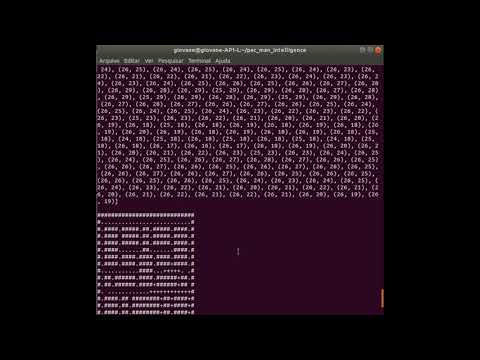

In [ ]:
from IPython.display import YouTubeVideo

YouTubeVideo('m4NgLzOgEAw', width=800, height=300)

# 5. Conclusões

Foram feitas execuções no mapa padrão e aleatório, e o teste extremo com 15 fantasmas no mapa padrão, adicionados manualmente.
De modo geral, o algoritmo *Simulated Annealing* teve um custo-benefício muito ruim. Provavelmente, ele ficou muito tempo preso em determinados nós o que provocou um gasto maior de tempo e, quando conseguia gerar um caminho, o mesmo era muito custoso.

Dentre os algoritmos de busca cega, o Breadth First Search foi quem teve o melhor resultado, em alguns momentos foi o melhor de todos. O pior foi o Depth First Search, que custava menos tempo, mas expandia nós demais.

Já os algoritmos de busca informada, não houve um padrão entre as heurísticas para determinar se uma foi melhor do que a outra. A resposta para isso é **depende**. No primeiro teste o Manhattan foi melhor com o A* e Euclides melhor com o Best First. Mas no segundo teste, isso se inverteu. Aqui, é interessante observar como a montagem do mapa e disposição dos inimigos influenciam mais do que se imaginava. Caso tenham poucos inimigos protegendo o objetivo, os algoritmos não terão muitos problemas.

Contudo, o desempenho de cada algoritmo tem um limite. No teste extremo, ficou claro que, caso haja muitos inimigos, não faz diferença alguma o algoritmo escolhido, já que o ambiente tornou-se muito hostil, impondo dificuldades para todos da mesma forma.

Por fim, é possível estabelecer um ranking:

* Melhor da busca cega: Breadth First Search
* Melhor informado: se todos os fantasmas estiverem antes do objetivo, então A* com Manhattan e Best First com Euclides. Se houver poucos fantasmas antes do objetivo, $A^*$ com Euclides e Best First com Manhattan.

## Referências Bibliográficas

RUSSELL, Stuart; NORVIG, Peter. Artificial intelligence: a modern approach. 2002.

AARTS, Emile; KORST, Jan; MICHIELS, Wil. Simulated annealing. In: Search methodologies. Springer, Boston, MA, 2005. p. 187-210.

BORGES, Ellen; NADER, Juliana; MENEGAS, Maíra. Inteligência Artificial aplicada ao jogo PACMAN.

E. BLACK, Paul. Manhattan distance. In: E. BLACK, Paul. Manhattan distance. [S. l.], 11 fev. 2019. Disponível em: https://xlinux.nist.gov/dads/HTML/manhattanDistance.html. Acesso em: 27 abr. 2020.

E. BLACK, Paul. Euclidian distance. In: E. BLACK, Paul. Euclidian distance. [S. l.], 17 dez. 2004. Disponível em: https://www.nist.gov/dads/HTML/euclidndstnc.html. Acesso em: 30 abr. 2020.

# Apêndice

## Participação da equipe

<table class="tg">
<thead>
  <tr>
    <th class="tg-7btt"></th>
    <th class="tg-7btt">Atividades desenvolvidas</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-c3ow">1</td>
    <td class="tg-c3ow">Modelagem do problema</td>
  </tr>
  <tr>
    <td class="tg-c3ow">2</td>
    <td class="tg-c3ow">Escolha dos algoritmos</td>
  </tr>
  <tr>
    <td class="tg-c3ow">3</td>
    <td class="tg-c3ow">Implementação dos algoritmos de busca informada</td>
  </tr>
  <tr>
    <td class="tg-c3ow">4</td>
    <td class="tg-c3ow">Implementação dos algoritmos de busca cega</td>
  </tr>
  <tr>
    <td class="tg-baqh">5</td>
    <td class="tg-baqh">Simulated Annealing</td>
  </tr>
  <tr>
    <td class="tg-baqh">6</td>
    <td class="tg-baqh">Embasamento teórico (relatório)</td>
  </tr>
  <tr>
    <td class="tg-baqh">7</td>
    <td class="tg-baqh">Elaboração do roteiro de testes</td>
  </tr>
  <tr>
    <td class="tg-baqh">8</td>
    <td class="tg-baqh">Execução dos testes</td>
  </tr>
  <tr>
    <td class="tg-c3ow">9 </td>
    <td class="tg-c3ow">Análise dos resultados</td>
  </tr>
  <tr>
    <td class="tg-baqh">10</td>
    <td class="tg-baqh">Versão final do relatório</td>
  </tr>
  <tr>
    <td class="tg-baqh">11</td>
    <td class="tg-baqh">Gravação do vídeo</td>
  </tr>
</tbody>
</table>


Distribuição das atividades pela equipe:

<table>
<thead>
  <tr>
    <th></th>
    <th>1</th>
    <th>2</th>
    <th>3</th>
    <th>4</th>
    <th>5</th>
    <th>6</th>
    <th>7</th>
    <th>8</th>
    <th>9</th>
    <th>10</th>
    <th>11</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td>Matteus</td>
    <td>✓</td>
    <td>✓</td>
    <td>✓</td>
    <td>✓</td>
    <td></td>
    <td></td>
    <td>✓</td>
    <td></td>
    <td></td>
    <td>✓</td>
    <td></td>
  </tr>
  <tr>
    <td>Giovane</td>
    <td>✓</td>
    <td>✓</td>
    <td></td>
    <td></td>
    <td></td>
    <td>✓</td>
    <td></td>
    <td></td>
    <td>✓</td>
    <td>✓</td>
    <td></td>
  </tr>
  <tr>
    <td>Christian</td>
    <td>✓</td>
    <td>✓</td>
    <td></td>
    <td></td>
    <td>✓</td>
    <td>✓</td>
    <td></td>
    <td></td>
    <td></td>
    <td></td>
    <td></td>
  </tr>
  <tr>
    <td>Maísa</td>
    <td>✓</td>
    <td>✓</td>
    <td></td>
    <td></td>
    <td></td>
    <td>✓</td>
    <td></td>
    <td></td>
    <td>✓</td>
    <td>✓</td>
    <td>✓</td>
  </tr>
  <tr>
    <td>Stéfani</td>
    <td>✓</td>
    <td>✓</td>
    <td></td>
    <td></td>
    <td></td>
    <td>✓</td>
    <td></td>
    <td>✓</td>
    <td></td>
    <td>✓</td>
    <td></td>
  </tr>
</tbody>
</table>

### Análise de desempenho

Para os testes de execução destes algoritmos foram utilizadas duas máquinas distintas: uma virtualizada e uma física. 

Seguem especificações:

#### Máquina virtualizada:

* 1 core de processamento de 2.2 GHz Intel Xenon 2ª Geração - Modelo 2018
* 1 GB de RAM DDR4 – Modelo 2018
* 50 GB de SSD
* Centos 7 
* Kernel 4.1

#### Máquina Física:

* Processamento de 1.8 GHz Intel i3
* 8 GB de RAM DDR3
* 50 GB de SSD
* Ubuntu 18.04

<img src="https://github.com/MatteusStranger/pac_man_intelligence/blob/master/Relatorio/ImagensIA/MAQ_FIS_TBL.png?raw=1">

<img src="https://github.com/MatteusStranger/pac_man_intelligence/blob/master/Relatorio/ImagensIA/MAQ_FIS_GRF.png?raw=1">

<img src="https://github.com/MatteusStranger/pac_man_intelligence/blob/master/Relatorio/ImagensIA/MAQ_VIRT_TBL.png?raw=1">

<img src="https://github.com/MatteusStranger/pac_man_intelligence/blob/master/Relatorio/ImagensIA/MAQ_VIRT_GRF.png?raw=1">